# 문제
수열 A가 주어졌을 때, 가장 긴 증가하는 부분 수열을 구하는 프로그램을 작성하시오.

예를 들어, 수열 A = {10, 20, 10, 30, 20, 50} 인 경우에 가장 긴 증가하는 부분 수열은 A = {**10**, **20**, 10, **30**, 20, **50**} 이고, 길이는 4이다.

## 입력
첫째 줄에 수열 A의 크기 N (1 ≤ N ≤ 1,000)이 주어진다.

둘째 줄에는 수열 A를 이루고 있는 Ai가 주어진다. (1 ≤ Ai ≤ 1,000)

## 출력
첫째 줄에 수열 A의 가장 긴 증가하는 부분 수열의 길이를 출력한다.



## 예제 입력
```
6
10 20 10 30 20 50
```

## 예제 출력
4




---



In [1]:
n = int(input())
numlist = list(map(int, input().split()))

6
10 20 10 30 20 50


In [9]:
purelist = []

for num in numlist:
  if len(purelist) == 0:
    purelist.append(num)
    print(purelist)
  if not num in purelist:
    if max(purelist) < num:
      purelist.append(num)
      print(purelist)

print(len(purelist))

[10]
[10, 20]
[10, 20, 30]
[10, 20, 30, 50]
4


In [8]:
max(purelist)

50



---



---



# 정답 풀이
- LIS(Longest Increasing Subsequence) 라는 유명한 DP 문제.
- dp 리스트에 자신을 포함하여 만들 수 있는 부분 수열 크기를 저장해야 함.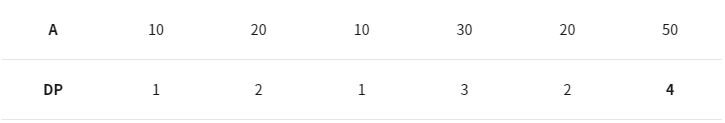
- 첫번째 인덱스부터 수열의 길이의 최댓값을 저장해 나감

In [10]:
N = int(input())
A = list(map(int, input().split()))

dp = [1] * N

for i in range(N):
    for j in range(i):
        if A[j] < A[i]:
            dp[i] = max(dp[i],dp[j]+1)

print(max(dp))

6
10 20 10 30 20 50
4


In [11]:
n = int(input())
a = list(map(int, input().split()))

dp = [0 for i in range(n)]

for i in range(n):
    for j in range(i):
        if a[i] > a[j] and dp[i] < dp[j]:
            dp[i] = dp[j]
    dp[i] += 1
    
print(max(dp))

6
10 20 10 30 20 50
4




---



---



## 다이나믹 프로그래밍
- 한 번 계산한 문제는 다시 계산하지 않도록 한다.
- 메모리 공간을 약간 더 사용해서 연산 속도를 비약적으로 증가

### 조건 
- 큰 문제를 작은 문제로 나눌 수 있다.
- 작은 문제에서 구한 정답은 그것을 포함하는 큰 문제에서도 동일하다.

### 예시
- 피보나치 수열 $$a_n = a_{n-1} + a_{n-2}, a_1=1, a_2=1 $$

- python 재귀함수로 구현
  ```
  import time

  def fibo(x):
      if x == 1 or x == 2:
          return 1

      return fibo(x-1) + fibo(x-2)

  for num in range(5, 40, 10):
      start = time.time()
      res = fibo(num)
      print(res, '-> 러닝타임:', round(time.time() - start, 2), '초')
  ```
  - 연산 수행시간이 기하급수적으로 늘어남
- 다이나믹 프로그래밍 방식(top-down)
  ```
  import time

  d = [0] * 50

  def fibo(x):
      if x == 1 or x == 2:
          return 1
      if d[x] != 0:
          return d[x]
      d[x] = fibo(x-1) + fibo(x-2)
      return d[x]

  for num in range(5, 40, 10):
      start = time.time()
      res = fibo(num)
      print(res, '-> 러닝타임:', round(time.time() - start, 2), '초')
  ```
  - 바로 한 번 결과를 수행한 것을 메모리에 저장해 놓고 다음에 똑같은 결과가 필요하면 다시 연산하지 않고 메모리에 저장된 그 값을 가져와 쓰는 것.
  - 메모제이션(캐싱) 방식 : top-down 방식
- 다이나믹 프로그래밍 방식(bottom-up)
  ```
  d = [0] * 100

  d[1] = 1 # 첫 번째 항
  d[2] = 1 # 두 번째 항
  N = 99   # 피보나치 수열의 99번째 숫자는?

  for i in range(3, N+1):
      d[i] = d[i-1] + d[i-2]

  print(d[N])
  ```
  - 작은 문제부터 차근차근 답을 도출해서 큰 문제를 해결
  - DP 테이블 이용